## Assignment 1 - Alpha algorithm

##### Input - list of tuples of str's: [(str1, ..., strL), (strJ,...strK), ..., (strM,...,strN)]
##### Output - set of tuples of tuples str's {((str1,...,strI), (strL,...,strK)),...}

In [256]:
from petri_net import PetriNet
from subprocess import check_call

In [257]:
log = [('a', 'b', 'c', 'd'), ('a', 'c', 'b', 'd'), ('a', 'e', 'd')]

#### Step 1. Make set of events

In [258]:
#expected output: set of str's
def all_events(log):
    tl = set()
    for item in log:
        for i in item:
            tl.add(i)
    return tl

events = all_events(log)

events

{'a', 'b', 'c', 'd', 'e'}

#### Step 2. Get all start events

In [259]:
#expected output: set of str's
def get_start_nodes(log):
    tl = set()
    for item in log:
        tl.add(item[0])
    return tl

start_nodes = get_start_nodes(log)

start_nodes

{'a'}

#### Step 3. Get all end events

In [260]:
#expected output: set of str's
def get_end_nodes(log):
    tl = set()
    for item in log:
        tl.add(item[-1])
    return tl

end_nodes = get_end_nodes(log)

end_nodes

{'d'}

#### Step 4. Make dataset

1. Define functions for causality, parallel and unrelated pairs<br>
2. Create footprint matrix<br>
3. Create pairs of events<br>
4. Iterate until no non-maximal pairs available

In [262]:
def footprint(log):
    t = {i: '#' for i in all_events(log)}
    matr = {i: t.copy() for i in all_events(log)}
    for item in log:
        for i in range(len(item) - 1):
            if item[i] == item[i + 1]:
                matr[item[i]][item[i]] = '||'

            elif matr[item[i]][item[i + 1]] == '#':
                matr[item[i]][item[i + 1]] = '->'
                matr[item[i + 1]][item[i]] = '<-'

            elif matr[item[i]][item[i + 1]] == '<-':
                matr[item[i]][item[i + 1]] = '||'
                matr[item[i + 1]][item[i]] = '||'

    return matr

In [263]:
def comb(matr):
    #matr = footprint(log)
    nod0 = set()
    for i in matr:
        for j in matr[i]:
            if matr[i][j] == '->':
                nod0.add((tuple(i), tuple(j)))
    #return nod
    while True:
        n = len(nod0)
        check = [0]*n
        new_nod = set()
        nod = list(nod0)
       # print(nod)
        for i in range(n - 1):
            for j in range(i + 1, n):
                #print(i, j, n)
                s = True
                
                for beg1 in nod[i][0]:
                   for beg2 in nod[j][0]:
                       if matr[beg1][beg2] != '#':
                          # print('#', nod[i], nod[j], matr[beg1][beg2])
                           s = False
                           break
                   if not s:
                        break
                if not s:
                    continue
                
                for end1 in nod[i][1]:
                   for end2 in nod[j][1]:
                       if matr[end1][end2] != '#':
                           #print('#', nod[i], nod[j], matr[end1][end2])
                           s = False
                           break
                   if not s:
                        break
                if not s:
                    continue
                
                for beg1 in nod[i][0]:
                   for end2 in nod[j][1]:
                       if matr[beg1][end2] != '->':
                           #print('->', nod[i], nod[j], matr[beg1][end2])
                           s = False
                           break
                   if not s:
                        break
                if not s:
                    continue
                
                for beg2 in nod[j][0]:
                   for end1 in nod[i][1]:
                       if matr[beg2][end1] != '->':
                           #print('->', nod[j], nod[i], matr[beg2][end1])
                           s = False
                           break
                   if not s:
                        break
                if not s:
                    continue
                
                t1, t2 = list(nod[i][0]), list(nod[i][1])
                t1.extend(nod[j][0])
                t2.extend(nod[j][1])
                new_one = (tuple(set(t1)), tuple(set(t2)))
                #new_one = (tuple(set(dict(nod[i][0]).extend(nod[j][0]))), tuple(set(dict(nod[i][1]).extend(nod[j][2]))))
                new_nod.add(new_one)
                check[i], check[j] = 1, 1
        
        for i in range(n):
            if check[i] == 0:
                new_nod.add(nod[i])
        nod0 = new_nod
        #print(check, nod0)
        if check == [0]*n:
            break
    return nod0     

In [264]:
def result(log):
    matr = footprint(log)
    res = comb(matr)
    return res

In [266]:
#expected output: set of tuples of tules of str's
dataset = result(log)
dataset

{(('a',), ('e', 'b')),
 (('a',), ('e', 'c')),
 (('e', 'b'), ('d',)),
 (('e', 'c'), ('d',))}

Expected output (order irrelevant): {(('a',), ('c', 'e')),
 (('a',), ('e', 'b')),
 (('c', 'e'), ('d',)),
 (('e', 'b'), ('d',))} 

#### Let's check the result with PetriNet drawer

In [267]:
pn = PetriNet()
filename = 'my_first_alpha_miner'
pn.generate_with_alpha(tl=events,
                       ti=start_nodes,
                       to=end_nodes,
                       yl=dataset,
                       dotfile="{}.dot".format(filename))
check_call(["dot", "-Tpng", "{}.dot".format(filename),"-o", "{}.png".format(filename)])

0

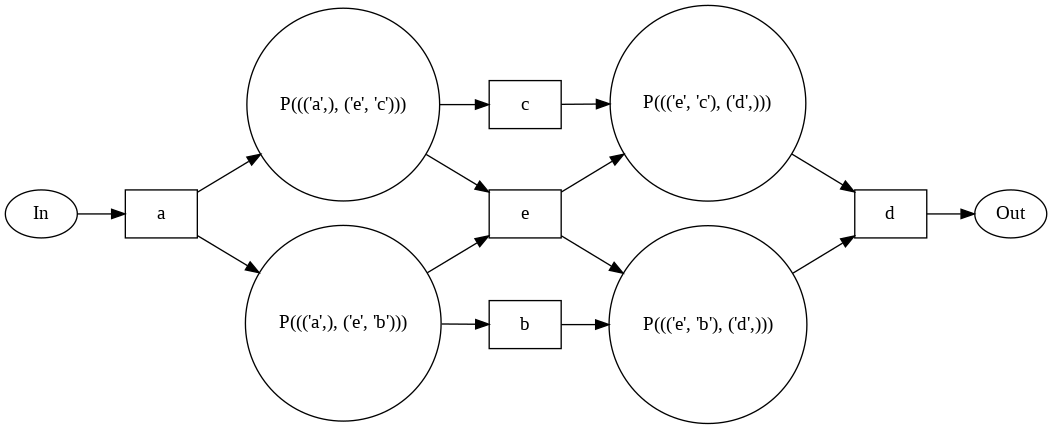

## Another log for testing

Input:

In [272]:
log = [('a', 'b', 'e', 'f'),
 ('a', 'b', 'e', 'c', 'd', 'b', 'f'),
 ('a', 'b', 'c', 'e', 'd', 'b', 'f'),
 ('a', 'b', 'c', 'd', 'e', 'b', 'f'),
 ('a', 'e', 'b', 'c', 'd', 'b', 'f')]
log

[('a', 'b', 'e', 'f'),
 ('a', 'b', 'e', 'c', 'd', 'b', 'f'),
 ('a', 'b', 'c', 'e', 'd', 'b', 'f'),
 ('a', 'b', 'c', 'd', 'e', 'b', 'f'),
 ('a', 'e', 'b', 'c', 'd', 'b', 'f')]

Expected output:

In [273]:
dataset = {(('a',), ('e',)), (('a', 'd'), ('b',)), (('b',), ('c', 'f')), (('c',), ('d',)), (('e',), ('f',))}
dataset

{(('a',), ('e',)),
 (('a', 'd'), ('b',)),
 (('b',), ('c', 'f')),
 (('c',), ('d',)),
 (('e',), ('f',))}

In [274]:
#Programm output
result(log)

{(('a',), ('e',)),
 (('a', 'd'), ('b',)),
 (('b',), ('c', 'f')),
 (('c',), ('d',)),
 (('e',), ('f',))}

In [275]:
result(log) == dataset

True

In [ ]:

'''def fix(comb, log, st, en):
    start = st(log)
    end = en(log)
    beg, fin = [], []
    comb2 = list(comb)
    for i in range(len(comb2)):
        comb2[i] = list(comb2[i])
        for j in range(len(comb2[i])):
            comb2[i][j] = list(comb2[i][j]) 
    beg.extend(start), fin.extend(end)
    for item in comb2:
        beg.extend(item[1])
        fin.extend(item[0])
    
    while True:
        comb_cp = comb2.copy()
        k = 0
        for i in range(len(comb2)):
            for el in comb2[i-k][0]:
                if beg.count(el) == 1:
                    if len(comb2[i-k][0]) == 1:
                        comb2.remove(comb2[i-k])
                        beg.remove(el)
                        k += 1
                    else:
                        comb2[i-k][0].remove(el)
                        beg.remove(el)

        k = 0
        for i in range(len(comb2)):
            for el in comb2[i-k][1]:
                if fin.count(el) == 1:
                    if len(comb2[i-k][1]) == 1:
                        comb2.remove(comb2[i-k])
                        fin.remove(el)
                        k += 1
                    else:
                        comb2[i-k][1].remove(el)
                        fin.remove(el)
        if comb2 == comb_cp:
            break
    return comb2
    
 
'''   
    
    '''for item in comb:
        for beg in item[0]:
            if beg not in start:
                for it in comb:'''
